In [2]:
import numpy as np
import matplotlib.pyplot as plt

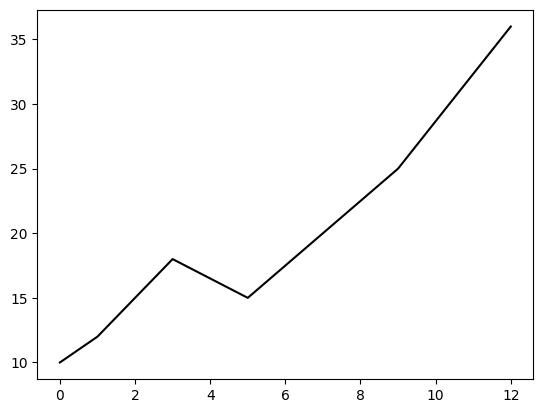

In [12]:
data = [
    [0, 1, 3, 5, 7, 9, 12],
    [10, 12, 18, 15, 20, 25, 36]
]

plt.plot(data[0], data[1], color='black')
plt.show()

In [15]:
def qr_mgs(mat):
    n, m = mat.shape
    assert n >= m

    mat = np.copy(mat).astype(np.float32)
    r = np.zeros((m, m))

    for j in range(m):
        r[j, j] = np.sqrt(mat[:, j].T.dot(mat[:, j]))
        mat[:, j] = mat[:, j] / r[j, j]
        for k in range(j + 1, m):
            r[j, k] = mat[:, j].T.dot(mat[:, k])
            mat[:, k] = mat[:, k] - mat[:, j] * r[j, k]
    
    return mat, r

In [44]:
def least_squares_with_degree(A, b, deg):
    q, r = qr_mgs(A)

    x = (np.linalg.inv(r) @ q.T @ b)
    
    predict = lambda a: sum(x[i, 0] * (a ** i) for i in range(deg + 1))

    plt.plot([i / 10.0 for i in range(121)], [predict(i / 10.0) for i in range(121)])
    plt.scatter(data[0], data[1], color='red', s=0.4)

In [46]:

b = np.matrix(data[1]).astype(np.float32).T

1. Polynomial of degree 1.

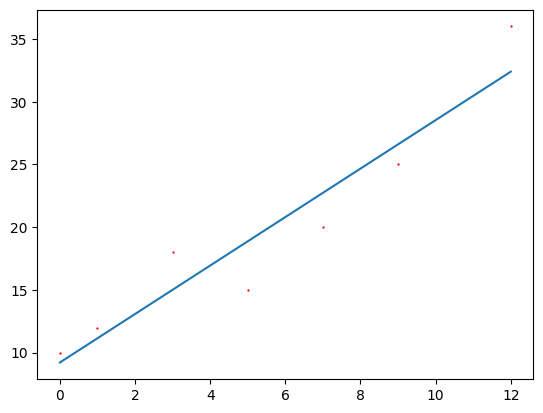

In [50]:
A = np.matrix([[d ** i for i in range(2)] for d in data[0]])
least_squares_with_degree(A, b, 1)

degree 2.

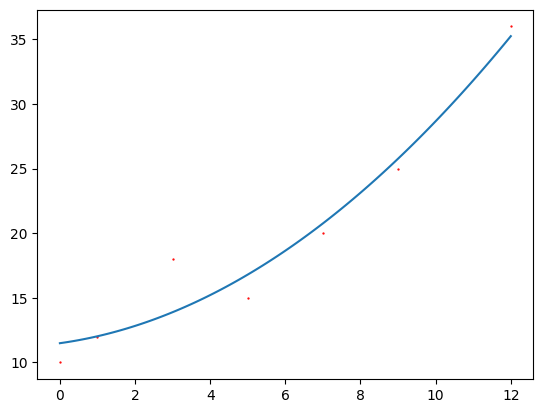

In [49]:
A = np.matrix([[d ** i for i in range(3)] for d in data[0]])
least_squares_with_degree(A, b, 2)

2. $A = \begin{pmatrix}1 & 1 \\ 2 & 3 \\ 0 & 1\end{pmatrix}, b = \begin{pmatrix}0 \\ 5 \\ 1\end{pmatrix}$
    1. $$x = A^\dagger b = \begin{pmatrix}5 & 7 \\ 7 & 11\end{pmatrix}^{-1}\begin{pmatrix}1 & 2 & 0 \\ 1 & 3 & 1\end{pmatrix}\begin{pmatrix}0 \\ 5 \\ 1\end{pmatrix} = \begin{pmatrix}12 & 31 & 7 \\ 18 & 47 & 11\end{pmatrix}\begin{pmatrix}0 \\ 5 \\ 1\end{pmatrix} = \begin{pmatrix}162 \\ 246\end{pmatrix}$$
    2. $$Q = \begin{pmatrix}1/\sqrt{5} & -2/5\sqrt{3} \\ 2/\sqrt{5} & 1/5\sqrt{3} \\ 0 & 1/\sqrt{3} \end{pmatrix}, \quad R = \begin{pmatrix}\sqrt{5} & 7/\sqrt{5} \\ 0 & \sqrt{3}\end{pmatrix}, \quad R^{-1} = \begin{pmatrix}-1/\sqrt{3} & 0 \\ 7/5\sqrt{3} & -1/\sqrt{5}\end{pmatrix}$$
    $$x = R^{-1}Q^Tb = \begin{pmatrix}-1/\sqrt{15} & -2/\sqrt{15} & 0 \\ 9/5\sqrt{15} & 13/5\sqrt{15} & -1/5\sqrt{15}\end{pmatrix}b = \begin{pmatrix}-10/\sqrt{15} \\ 64/5\sqrt{15}\end{pmatrix}$$